In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import  RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import  confusion_matrix,classification_report

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
#Loading the dataset
data_set = pd.read_csv("electricity-normalized.csv")

In [7]:
data_set.sample(10)

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
814,0.000708,4,0.978723,0.044134,0.497471,0.003467,0.422915,0.414912,DOWN
37593,0.890270,1,0.191489,0.018464,0.172121,0.001203,0.296996,0.781140,DOWN
43412,0.907924,3,0.425532,0.083193,0.524844,0.005700,0.671932,0.270614,UP
5507,0.014247,4,0.744681,0.040591,0.673609,0.003467,0.422915,0.414912,DOWN
10982,0.031592,6,0.808511,0.077819,0.294109,0.003467,0.422915,0.414912,UP
6197,0.017964,5,0.106383,0.076468,0.286373,0.003467,0.422915,0.414912,UP
24821,0.464493,1,0.106383,0.027471,0.124368,0.001849,0.258415,0.564035,DOWN
18535,0.443343,3,0.148936,0.031524,0.184469,0.002034,0.250906,0.750439,DOWN
34063,0.880846,4,0.659574,0.030443,0.451949,0.001948,0.469446,0.673246,UP
18220,0.443033,3,0.595745,0.057854,0.509819,0.003965,0.532885,0.410965,DOWN


In [8]:
data_set.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,UP
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,UP
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,UP
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,UP
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,DOWN


### EDA --- EXPLOTORY DATA ANALYSIS

In [10]:
data_set.describe()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
count,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000,45312.000000
mean,0.499080,4.003178,0.500000,0.057868,0.425418,0.003467,0.422915,0.500526
std,0.340308,1.998695,0.294756,0.039991,0.163323,0.010213,0.120965,0.153373
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031934,2.000000,0.250000,0.035127,0.309134,0.002277,0.372346,0.414912
50%,0.456329,4.000000,0.500000,0.048652,0.443693,0.003467,0.422915,0.414912
75%,0.880547,6.000000,0.750000,0.074336,0.536001,0.003467,0.469252,0.605702
max,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data_set.corr()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
date,1.000000e+00,4.846469e-03,-1.331142e-15,-0.151428,0.066748,0.003225,0.055323,0.405012
day,4.846469e-03,1.000000e+00,3.751487e-18,0.003292,-0.052672,0.000123,0.077716,-0.056159
period,-1.331142e-15,3.751487e-18,1.000000e+00,0.104155,0.445547,0.023245,0.192945,-0.116979
nswprice,-1.514277e-01,3.291678e-03,1.041553e-01,1.000000,0.304952,0.286072,0.307275,-0.275001
nswdemand,6.674768e-02,-5.267197e-02,4.455472e-01,0.304952,1.000000,0.086393,0.668501,-0.267897
vicprice,3.224591e-03,1.226526e-04,2.324549e-02,0.286072,0.086393,1.000000,0.127553,-0.084166
vicdemand,5.532348e-02,7.771631e-02,1.929449e-01,0.307275,0.668501,0.127553,1.000000,-0.555525
transfer,4.050120e-01,-5.615873e-02,-1.169790e-01,-0.275001,-0.267897,-0.084166,-0.555525,1.000000


<AxesSubplot:>

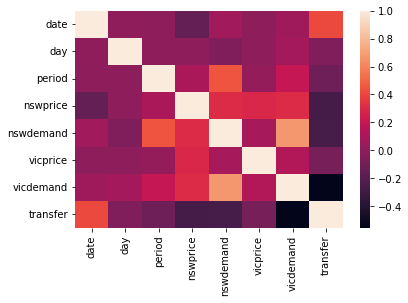

In [12]:
sns.heatmap(data_set.corr())

In [13]:
data_set.isna().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

In [14]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45312 entries, 0 to 45311
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       45312 non-null  float64
 1   day        45312 non-null  int64  
 2   period     45312 non-null  float64
 3   nswprice   45312 non-null  float64
 4   nswdemand  45312 non-null  float64
 5   vicprice   45312 non-null  float64
 6   vicdemand  45312 non-null  float64
 7   transfer   45312 non-null  float64
 8   class      45312 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.1+ MB


In [16]:
data_set.shape

(45312, 9)

In [17]:
data_set["day"].value_counts()

2    6480
3    6480
4    6480
5    6480
6    6480
7    6480
1    6432
Name: day, dtype: int64

<AxesSubplot:xlabel='day', ylabel='count'>

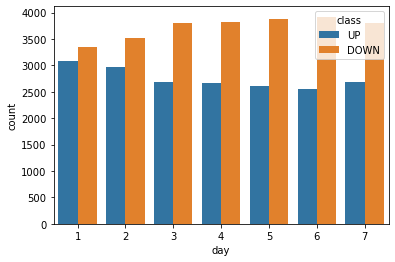

In [18]:
sns.countplot(x="day",hue="class",data=data_set)

In [19]:
data_set["class"].value_counts()

DOWN    26075
UP      19237
Name: class, dtype: int64

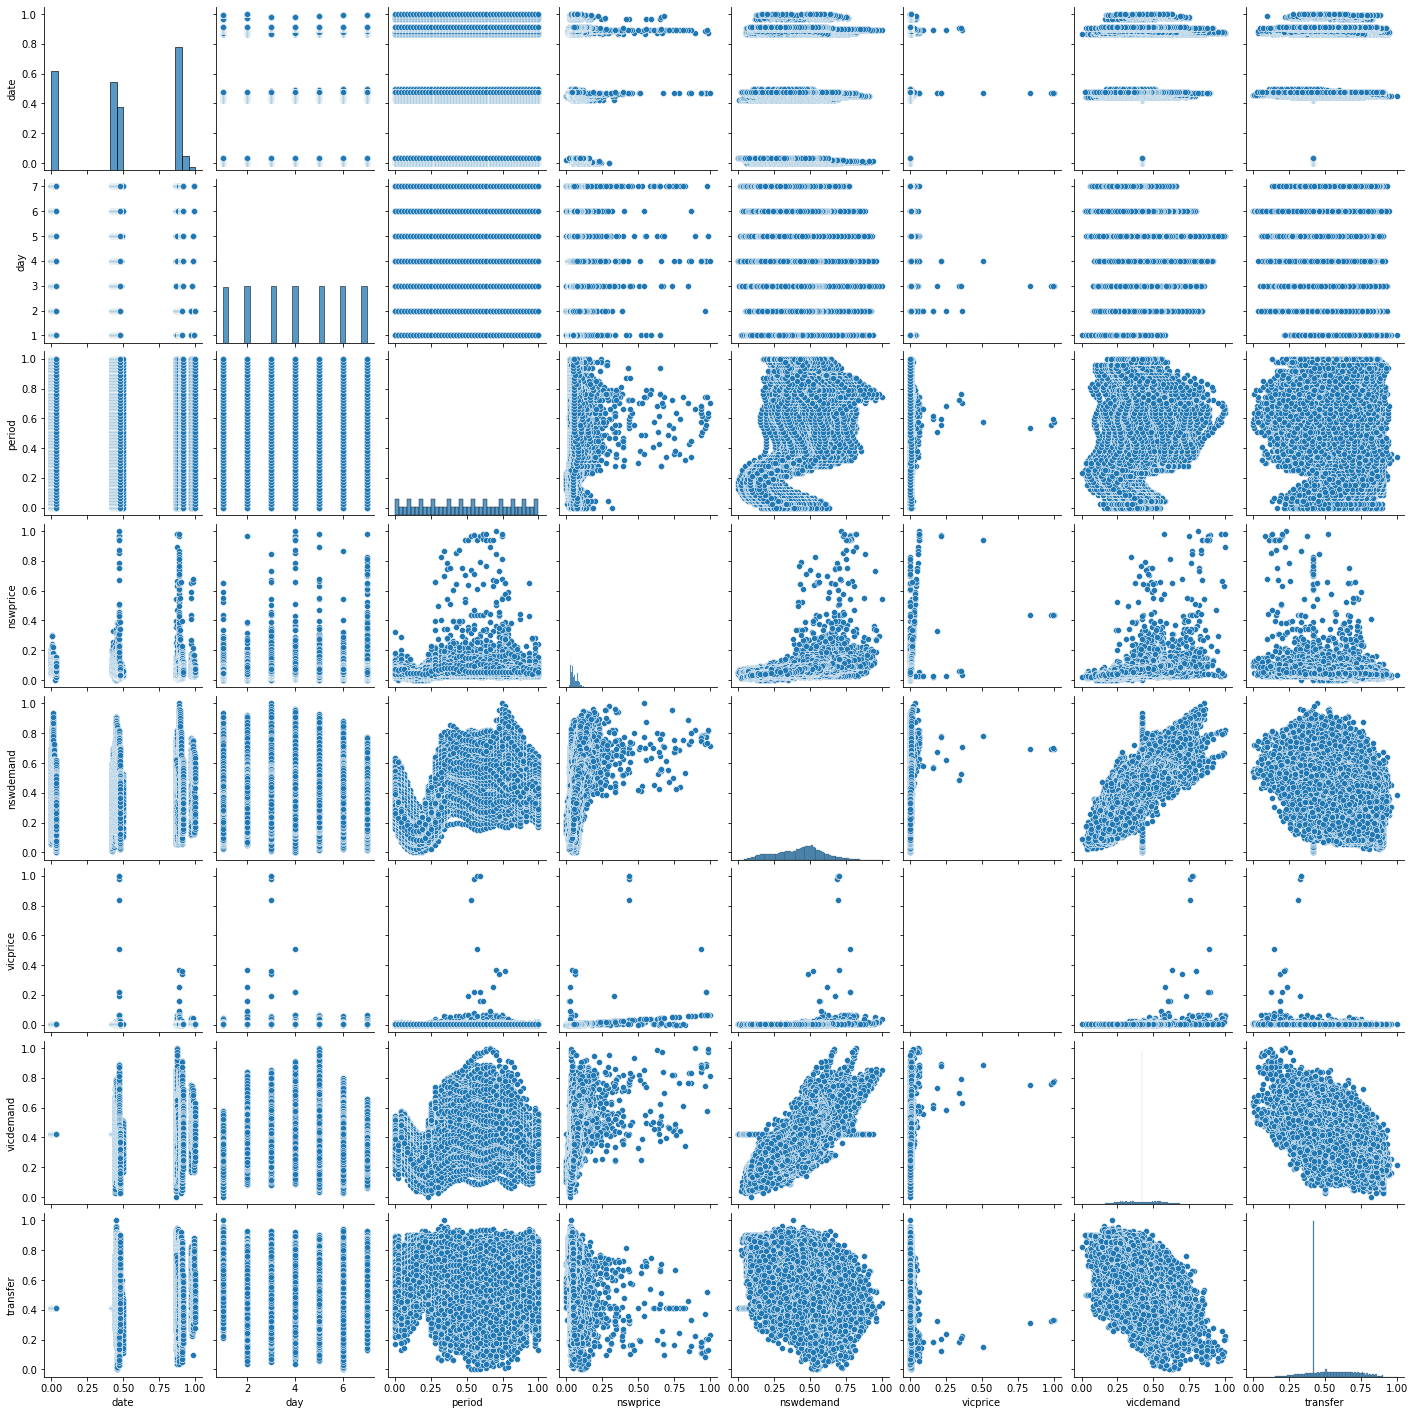

In [20]:
sns.pairplot(data_set)

### MODEL BUILDING

In [21]:
#Mapping 1 to up and 0 to down to feature class
data_set["class"]=data_set["class"].map({"UP":1,"DOWN":0})

In [22]:
data_set.head()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,0.0,2,0.000000,0.056443,0.439155,0.003467,0.422915,0.414912,1
1,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,1
2,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,1
3,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,1
4,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,0


In [23]:
X = data_set.drop("class",axis=1)
y = data_set["class"]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)#Splitting the data into train and test set

In [25]:
x_train.shape,x_test.shape

((36249, 8), (9063, 8))

In [26]:
clf0 = KNeighborsClassifier()
clf1= RandomForestClassifier()
clf2 = SVC()
clf3 = GaussianNB()
clf4 = DecisionTreeClassifier()

In [27]:
def classifier(clf0,clf1,clf2,clf3,clf4,x_train,y_train,x_test,y_test):
    clfs = [clf0,clf1, clf2, clf3,clf4]
    all_clfs_acc = []    
    for clf in clfs:
        clf.fit(x_train,y_train)
        pred = clf.predict(x_test)
        acc = accuracy_score(y_test,pred)
        all_clfs_acc.append(acc)
    return all_clfs_acc

In [28]:
classifier(clf0,clf1,clf2,clf3,clf4,x_train,y_train,x_test,y_test)

[0.8018316230828644,
 0.9109566368752069,
 0.7396005737614476,
 0.7317665232263048,
 0.8875648240097098]

###### As you can see, the function returned 5 accuracies. The first accuracy correspond to KNeighborsClassifier, the second is RandomForestClassifier, and the third is SVC(Support Vector Machine, the third one is  Naive Bayes and the last one is Decision Tree Now, let us use Voting Classifier to aggregate the results of all of those 3 classifiers. 

In [32]:
vot_clas = VotingClassifier(
estimators=[("K_neig",clf0),
            ("Rand_F",clf1),
            ("SVC",clf2),
            ("Naive",clf3),
            ("Dec_T",clf4)
        
],voting="hard"
)

In [33]:
vot_clas.fit(x_train,y_train)

VotingClassifier(estimators=[('K_neig', KNeighborsClassifier()),
                             ('Rand_F', RandomForestClassifier()),
                             ('SVC', SVC()), ('Naive', GaussianNB()),
                             ('Dec_T', DecisionTreeClassifier())])

In [34]:
def accuracy(model,x_test,y_test):
    prediction = model.predict(x_test)
    acc = accuracy_score(y_test,prediction)
    return acc

In [35]:
accuracy(vot_clas,x_test,y_test)

0.8613042039059914